In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as spstats

In [2]:
from dap import DAPcython
from dap.utils import obs_params, obs_params_gbar, syn_current

In [25]:
from dap.dap_sumstats_moments import DAPSummaryStatsMoments

In [3]:
params, labels = obs_params_gbar(reduced_model=False)
I, time, t_on, t_off = syn_current(duration=120, dt=0.1)

In [4]:
# define models / check setters
dap = DAPcython(-75, params, solver=2)

In [5]:
# run models
data = dap.simulate(0.1, time, I)

In [6]:
x = {'data':data}
x

{'data': array([[-75.0026837 ],
        [-75.01615545],
        [-75.00661064],
        ...,
        [-76.66453218],
        [-76.66111981],
        [-76.68563365]])}

In [7]:
time

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.198e+02, 1.199e+02,
       1.200e+02])

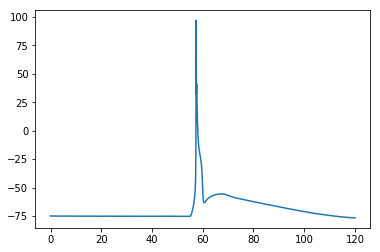

In [8]:
plt.plot(time, data);

In [9]:
N = data.shape[0]
t = time
dt = t[1] - t[0]

n_mom = 5
n_xcorr=5

## Calculate Summary Statistics

ind (array([   0,    1,    2, ..., 1198, 1199, 1200]), array([0, 0, 0, ..., 0, 0, 0]))
ind2 (array([], dtype=int64), array([], dtype=int64))


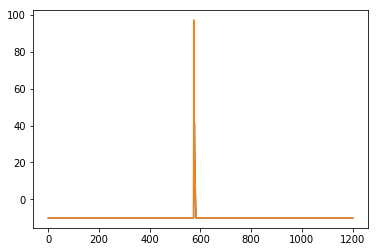

In [10]:
v = np.copy(data)
# put everything to -10 that is below -10 or has negative slope
ind = np.where(v < -10)
print('ind', ind)
v[ind] = -10
plt.plot(v)
ind2 = np.where(np.diff(v) < 0)
print('ind2', ind2)
v[ind] = -10
plt.plot(v)


In [11]:
v

array([[-10.],
       [-10.],
       [-10.],
       ...,
       [-10.],
       [-10.],
       [-10.]])

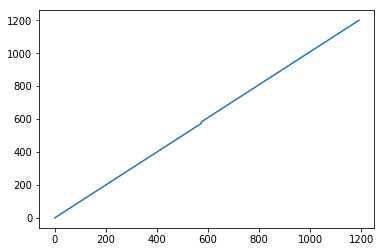

In [12]:
plt.plot(ind[0]);

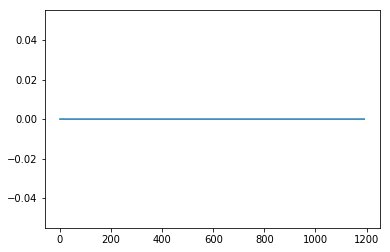

In [13]:
plt.plot(ind[1]);

In [14]:
np.diff(v) < 0

array([], shape=(1201, 0), dtype=bool)

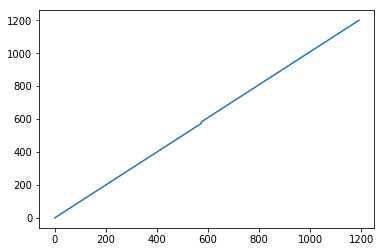

In [15]:
plt.plot(ind[0]);

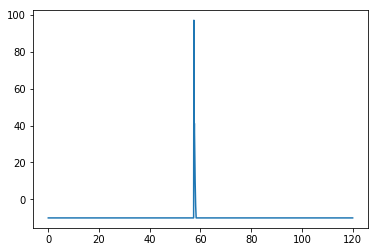

In [16]:
plt.plot(t, v);

In [17]:
# remaining negative slopes are at spike peaks
ind = np.where(np.diff(v) < 0)
ind

(array([], dtype=int64), array([], dtype=int64))

### Spike Times

In [18]:
# spike_times = np.array(t)[ind]

In [19]:
# spike_times_stim = spike_times[(spike_times > t_on) & (spike_times < t_off)]

In [20]:
# # number of spikes
# if spike_times_stim.shape[0] > 0:
#     spike_times_stim = spike_times_stim[np.append(1, np.diff(spike_times_stim))>0.5]

### Inter spike interval 

In [21]:
# ISI
#ISI = np.diff(spike_times_stim).astype(float)
# ind = [0,1,-1]
# ISI1 = np.array([1000.]*3)
# ISI1[0:np.maximum(0,spike_times_stim.shape[0]-1)] = ISI[ind[0:np.maximum(0,spike_times_stim.shape[0]-1)]]
#if spike_times_stim.shape[0] > 1:
#    ISImom = np.array([np.mean(ISI),np.std(ISI)])
#else:
#    ISImom = np.array([t_off,0.])
#ISI1 = np.array([t_off-t_on,0.])
#ISI1[0:np.maximum(0,spike_times_stim.shape[0]-1)] = ISImom[0:np.maximum(0,spike_times_stim.shape[0]-1)]


## accommodation index
#if spike_times_stim.shape[0] < 3:
#    A_ind = 1000
#else:
#    ISI = np.diff(spike_times_stim)
#    A_ind = np.mean( [ (ISI[i_min+1]-ISI[i_min])/(ISI[i_min+1]+ISI[i_min]) for i_min in range (0,ISI.shape[0]-1)] )

In [22]:
# resting potential and std
rest_pot = np.mean(x['data'][t<t_on])
rest_pot_std = np.std(x['data'][int(.9*t_on/dt):int(t_on/dt)])

In [23]:
# auto-correlations
x_on_off = x['data'][(t > t_on) & (t < t_off)]-np.mean(x['data'][(t > t_on) & (t < t_off)])
x_on_off

array([[-41.09631311],
       [-40.8486501 ],
       [-40.48800827],
       [-40.00421026],
       [-39.45449947],
       [-38.82322709],
       [-38.1167447 ],
       [-37.31766189],
       [-36.45195379],
       [-35.50320874],
       [-34.48075264],
       [-33.35993844],
       [-32.18756264],
       [-30.94621034],
       [-29.59680624],
       [-28.07575111],
       [-26.43699611],
       [-24.51888468],
       [-22.22055834],
       [-19.27978031],
       [-14.95948441],
       [ -7.02777846],
       [ 15.5361794 ],
       [130.9962364 ],
       [ 66.10977033],
       [ 75.21740251],
       [ 63.37179345],
       [ 52.67796935],
       [ 43.48724502],
       [ 36.16504033],
       [ 30.63628961],
       [ 26.45388157],
       [ 23.28991555],
       [ 20.81153403],
       [ 18.78429275],
       [ 17.07941547],
       [ 15.56544971],
       [ 14.20093079],
       [ 12.95027399],
       [ 11.7191463 ],
       [ 10.47353226],
       [  9.16658888],
       [  7.71486871],
       [  6

In [24]:
x_corr_val = np.dot(x_on_off,x_on_off)

ValueError: shapes (49,1) and (49,1) not aligned: 1 (dim 1) != 49 (dim 0)

In [ ]:
xcorr_steps = np.linspace(1./dt,n_xcorr*1./dt,n_xcorr).astype(int)
x_corr_full = np.zeros(n_xcorr)
for ii in range(n_xcorr):
    x_on_off_part = np.concatenate((x_on_off[xcorr_steps[ii]:],np.zeros(xcorr_steps[ii])))
    x_corr_full[ii] = np.dot(x_on_off,x_on_off_part)

x_corr1 = x_corr_full/x_corr_val

In [ ]:
print(x_corr_full)
print(x_corr_val)

In [ ]:
std_pw = np.power(np.std(x['data'][(t > t_on) & (t < t_off)]), np.linspace(3,n_mom,n_mom-2))
std_pw = np.concatenate((np.ones(1),std_pw))
moments = spstats.moment(x['data'][(t > t_on) & (t < t_off)], np.linspace(2,n_mom,n_mom-1))/std_pw

In [ ]:
# concatenation of summary statistics
sum_stats_vec = np.concatenate((
        np.array([spike_times_stim.shape[0]]),
        x_corr1,
        np.array([rest_pot,rest_pot_std,np.mean(x['data'][(t > t_on) & (t < t_off)])]),
        moments
    ))
